## Observations and Insights 

In [200]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merged = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_study_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [58]:
# Checking the number of mice.
mouse_study_merged["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_merged[mouse_study_merged.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_merged.loc[mouse_study_merged["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study_merged[mouse_study_merged["Mouse ID"] != "g989"]    # or drop only the duplicate rows but keep mouse g989 using df.drop_duplicates()
mouse_study_clean.head()                                                            # would have to specify which rows to keep, and not sure which values for tumor volume and metastatic sites are correct.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tvol_mean = mouse_study_clean.groupby(mouse_study_clean["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tvol_median = mouse_study_clean.groupby(mouse_study_clean["Drug Regimen"])["Tumor Volume (mm3)"].median()
tvol_var = mouse_study_clean.groupby(mouse_study_clean["Drug Regimen"])["Tumor Volume (mm3)"].var()
tvol_stddev = mouse_study_clean.groupby(mouse_study_clean["Drug Regimen"])["Tumor Volume (mm3)"].std()
tvol_sem = mouse_study_clean.groupby(mouse_study_clean["Drug Regimen"])["Tumor Volume (mm3)"].sem()

stats_df = pd.DataFrame({
    "Tumor Volume_mean": tvol_mean,
    "tvol_median": tvol_median,
    "Tumor Volume_var": tvol_var,
    "Tumor Volume_stddev": tvol_stddev,
    "Tumor Volume_sem": tvol_sem,
},
    index=mouse_study_clean["Drug Regimen"].unique()
) 
stats_df


,Tumor Volume_mean,tvol_median,Tumor Volume_var,Tumor Volume_stddev,Tumor Volume_sem
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

# mouse_study_clean.groupby(mouse_study_clean["Drug Regimen"])["Tumor Volume (mm3)"].mean()
# mouse_study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_study_clean[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
mouse_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


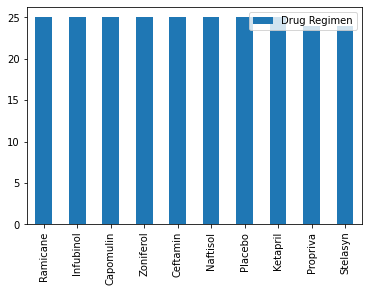

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

treatment_count = mouse_study_clean.groupby(mouse_study_clean["Mouse ID"])["Drug Regimen"].first().value_counts().to_frame()
treatment_count.plot(kind="bar")
plt.show()


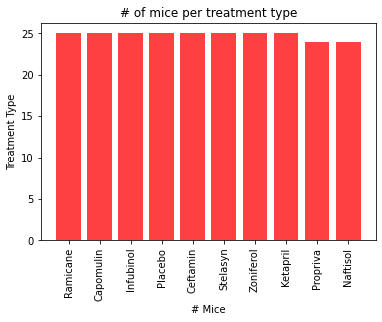

In [201]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = mouse_study_clean["Drug Regimen"].unique()
y_axis = mouse_study_clean.groupby(mouse_study_clean["Mouse ID"])["Drug Regimen"].first().value_counts()
plt.title("# of mice per treatment type")
plt.xlabel("# Mice")
plt.ylabel("Treatment Type")
plt.bar(x_axis, y_axis, color='r', alpha=0.75, align="center")
plt.xticks(rotation=90)
plt.show()


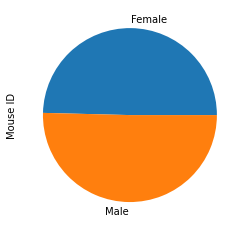

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
m_f_count = mouse_study_clean.groupby(["Sex"])["Mouse ID"].nunique()
m_f_count.plot(kind="pie")
plt.show()
# males = mouse_study_clean["Sex"].unique()
# m_f_count = mouse_study_clean.groupby(["Sex"])["Mouse ID"].nunique()

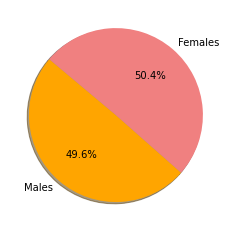

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
m_f_count = mouse_study_clean.groupby(["Sex"])["Mouse ID"].nunique()
labels = ["Males", "Females"]
colors = ["orange", "lightcoral"]
plt.pie(m_f_count, explode=None, labels=labels, colors=colors,
autopct="%1.1f%%", shadow=True, startangle=140);


## Quartiles, Outliers and Boxplots

In [54]:
mouse_study_clean.head(12)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin, Ramicane, Infubinol, and Ceftamin
# df.set_index("Mouse ID")

last_timepoint_df = mouse_study_clean.groupby(["Mouse ID"])["Timepoint"].max().to_frame() # now add tumor vol for each mouse at that max timepoint
# last_timepoint_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# tvol_final = mouse_study_clean.groupby(["Drug Regimen", "Mouse ID"])[["Timepoint", "Tumor Volume (mm3)"]].max() # now add tumor vol for each mouse at that max timepoint
tvol_final = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].groupby(["Mouse ID"])["Drug Regimen", "Tumor Volume (mm3)"].last() # last() works because the last timepoint is listed last
tvol_sorted = tvol_final.sort_values(by="Tumor Volume (mm3)")
tvol_sorted
# mouse_study_clean[mouse_study_clean["Drug Regimen"] == "Capomulin"]

# tvol_final = pd.DataFrame()
# pd.merge(mouse_study_clean, last_timepoint_df, how="inner", on="Mouse ID", suffixes=("", "_last"))
# tvol_last_timepoint = mouse_study_clean.loc[mouse_study_clean["Timepoint"].max()]
# tvol_last_timepoint

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
k403,Ramicane,22.050126
s185,Capomulin,23.343598
m601,Capomulin,28.430964
x401,Capomulin,28.484033
g791,Ramicane,29.128472
...,...,...
l471,Ceftamin,67.748662
a203,Infubinol,67.973419
y769,Ceftamin,68.594745


In [164]:
tvol_sorted.describe()

,Tumor Volume (mm3)
count,100.000000
mean,47.197795
std,12.953884
min,22.050126
25%,37.187744
50%,45.000000
75%,59.930262
max,72.226731


In [165]:
# treatments = mouse_study_clean.groupby(mouse_study_clean["Mouse ID"])["Drug Regimen"].first().unique()
# treatments
tvol_sorted.head()

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
k403,Ramicane,22.050126
s185,Capomulin,23.343598
m601,Capomulin,28.430964
x401,Capomulin,28.484033
g791,Ramicane,29.128472


In [210]:
# Put treatments into a list for for loop (and later for plot labels)
# treatments = mouse_study_clean.groupby(mouse_study_clean["Mouse ID"])["Drug Regimen"].first().unique()
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.  ## for each drug regimen or for the dataset as a whole?

# tumor_vol_IQR = st.iqr(tvol_final["Tumor Volume (mm3)"])
# quantiles = tvol_final["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
q1 = np.percentile(tvol_sorted["Tumor Volume (mm3)"], 25)
q2 = np.percentile(tvol_sorted["Tumor Volume (mm3)"], 50)
q3 = np.percentile(tvol_sorted["Tumor Volume (mm3)"], 75)
tumor_vol_iqr = q3 - q1
lower_bound = q1 - (1.5 * tumor_vol_iqr)
upper_bound = q3 + (1.5 * tumor_vol_iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes
tumor_volumes_Capomulin = tvol_sorted.loc[tvol_sorted["Drug Regimen"] == treatments[0]]["Tumor Volume (mm3)"]
tumor_volumes_Ramicane = tvol_sorted.loc[tvol_sorted["Drug Regimen"] == treatments[1]]["Tumor Volume (mm3)"]
tumor_volumes_Infubinol = tvol_sorted.loc[tvol_sorted["Drug Regimen"] == treatments[2]]["Tumor Volume (mm3)"]
tumor_volumes_Ceftamin = tvol_sorted.loc[tvol_sorted["Drug Regimen"] == treatments[3]]["Tumor Volume (mm3)"]
tumor_volumes = [tumor_volumes_Capomulin, tumor_volumes_Ramicane, tumor_volumes_Infubinol, tumor_volumes_Ceftamin]

    # add subset 
    
    
    # Determine outliers using upper and lower bounds
for tumor_size in tumor_volumes_Capomulin:
    if (tumor_size > upper_bound) or (tumor_size < lower_bound):
        tumor_vol_data.append(tumor_size)
        
for tumor_size in tumor_volumes_Ramicane:
    if (tumor_size > upper_bound) or (tumor_size < lower_bound):
        tumor_vol_data.append(tumor_size)
        
for tumor_size in tumor_volumes_Infubinol:
    if (tumor_size > upper_bound) or (tumor_size < lower_bound):    # should have one outlier for this regimen
        tumor_vol_data.append(tumor_size)
        
for tumor_size in tumor_volumes_Ceftamin:
    if (tumor_size > upper_bound) or (tumor_size < lower_bound):
        tumor_vol_data.append(tumor_size)
        
tumor_volumes_Infubinol.describe()

count    25.000000
mean     58.178246
std       8.602957
min      36.321346
25%      54.048608
50%      60.165180
75%      65.525743
max      72.226731
Name: Tumor Volume (mm3), dtype: float64

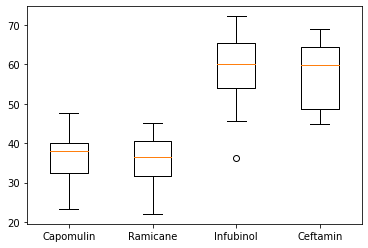

In [205]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volumes, labels=treatments)
plt.show()

## Line and Scatter Plots

In [259]:
Capomulin_mouse = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin", "Mouse ID"].unique()[0]
Capomulin_mouse

's185'

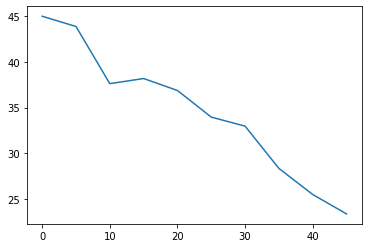

In [263]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# time = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin", "Timepoint"]
# volume = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
time = mouse_study_clean.loc[mouse_study_clean["Mouse ID"] == "s185", "Timepoint"]
volume = mouse_study_clean.loc[mouse_study_clean["Mouse ID"] == "s185", "Tumor Volume (mm3)"]
plt.plot(time, volume); # the semicolon removes the text "[<matplotlib.lines.Line2D at 0x7f178bf341d0>]" from the plot

No handles with labels found to put in legend.


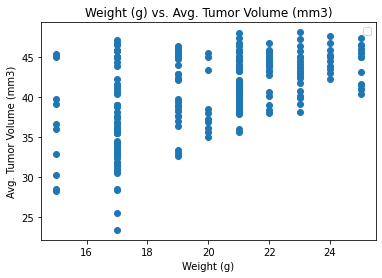

In [272]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin", "Weight (g)"]
volume = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]    # must convert to AVG tumor volume
plt.legend(loc="best")

plt.title("Weight (g) vs. Avg. Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")

plt.scatter(weight, volume); # the semicolon removes the text "[<matplotlib.lines.Line2D at 0x7f178bf341d0>]" from the plot


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
